In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import hyperloglog
import pylab
import random

# Probabilistic Data Structures

## Abstract

Probabilistic Data Structures are data structures, which provide approximated (instead of straightforward) answer to a query with a reliable way for estimating possible errors. They were introduced to address the need of more efficient handling (e.g. receiving, processing, storage, and/or retrieving) of Big Data. Various algorithms have been proposed so far, and HyperLogLog is one of them. This paper overviews Probabilistic Data Structures in general, and HyperLogLog in particular. It also shows where and how HyperLogLog is implemented in practice.

Key words: *Big Data*, *Probabilistic Data Structures*, *Cardinality estimate*, *HyperLogLog*.

## Introduction

Development and spread of Internet and Information and Communication Technologies (ICT) over the last 20 years led to a huge increase in the amount of data generated by various machines and applications. Reliable storage, fast processing and retrieving, and thereafter reusing of these data became a key challenge both for end-users and for soft- and hardware developers. Traditional data searching and retrieving algorithms applied in the 1990s were not useful and efficient anymore. Hence, existing (deterministic) data structures couldn’t meet clients’ demand any longer in terms of required speed and space. 

For this reason, it could be assumed that new tools and algorithms for data gathering, storage, processing, retrieving, and reusing had to be invented. Scientists, including computer scientists turned to mathematics to find solution of this problem (known as the "Big Data" problem). As will be seen below, both Probability Theory and Set Theory helped for improving time and resource efficiency of data management algorithms. 

This paper is organised as follows: Chapter 1 explains what a regular Data Structure is, and Chapter 2 – what a Probabilistic Data Structure is. One of the most widely used probabilistic algorithms is described in the third Chapter. Thereafter follows an overview of its function (Chapter 4) and structure (Chapter 5). The last Chapter provides an example of a Probabilistic Data Structure, including where it is put in operation.

## 1. What is a Data Structure?

At the very beginning it is necessary to explain what a data structure is. Simply saying, **“data structures are the way we are able to store and retrieve data”**[1]. Data structures are the building blocks of most algorithms[2].

Data structures (DS) very much resemble the way people organise things in real life. For example, it would be inconvenient if tomatoes and potatoes are placed next to washing and cleaning items in the supermarket, or apples under grain products. In order to avoid wandering and wasting clients’ time, shops arrange their products per type, e.g. food stuffs (grouped into meat products, dairy products, etc.), sanitizers, etc. Similarly, data structures indicate the way the information is organised and stored in the digital space[1].

Data structures are characterised with four main functions: inputting information (the way data is received); processing information (if and how data is manipulated); maintaining information (this aspect concerns the way data is organised); and retrieving information (which is related to finding and returning the data).
Almost every programme or software system uses data structures[3]. The most widespread ones are presented in the table below.

**Table 1. Data Structures types**

No | DS Type | Description | Application
- |:- |:- |:-
1 | Arrays | An array is a structure of fixed-size, which can hold items of the same data type. It can be an array of integers, of floating-point numbers, of strings or even an array of arrays. Arrays are indexed (random access is possible) | Building blocks to build other data structures (e.g. array lists, heaps, hash tables, vectors and matrices); For different sorting algorithms (e.g. insertion sort, quick sort, bubble sort and merge sort).
2 | Linked Lists | A linked list is a sequential structure that consists of a sequence of items in linear order which are linked to each other. | Used for symbol table management in compiler design; Used in switching between programs using Alt + Tab
3 | Stacks (LIFO) | A stack is a structure, where the element placed at last can be accessed at first. | Used for expression evaluation; Used to implement function calls in recursion programming.
4 | Queues (FIFO) | A queue is a structure, where the element placed at first can be accessed at first. | Used to manage threads in multithreading; Used to implement queuing systems.
5 | Hash Tables | A Hash Table is a DS that stores values which have keys associated with each of them. It supports lookup efficiently if the key associated with the value is known. | Used to implement database indexes; Used to implement associative arrays; Used to implement the “set” data structure.
6 | Trees | A tree is a hierarchical structure where data is organized hierarchically and are linked together. There are various types of Trees: binary search tree, B tree, treap, red-black tree, splay tree, AVL tree and n-ary tree. | Binary Trees: Used to implement expression parsers and expression solvers; Binary Search Tree: used in many search applications where data are constantly entering and leaving; Heaps: used by Java Virtual Machine to store Java objects;  Treaps: used in wireless networking.
7 | Heaps | A Heap is a special case of a binary tree where the parent nodes are compared to their children with their values and are arranged accordingly. | Used in heapsort algorithm; Used to implement priority queues; Used to find the kᵗʰ smallest (or largest) value in a given array.
8 | Graphs | A graph consists of a finite set of vertices or nodes and a set of edges connecting these vertices. The order of a graph is the number of vertices. The size of a graph is the number of edges in the graph. | Used to represent social media networks. Used to represent web pages and links by search engines. Used to represent locations and routes in GPS.

Source: *Medium: "8 Common Data Structures every Programmer must know"*

Despite these useful techniques, the “exponential increase in the data generated in the last few years” produced from different sources such as “Internet of Things” sensors, social networks, etc. turned out to pose a real challenge for data storing and retrieving systems[4]. Hence, the data structures in Table 1, which are based on traditional algorithms, couldn't handle the huge amount of information generated today.

Therefore, computer scientist invented faster and more efficient solutions by employing knowledge from Probability and Set Theories.

## 2. What is a Probabilistic Data Structure?

**Probabilistic Data Structure** (PDS) is a solution to the "Big Data" problem. It “is a common name of data structures based mostly on different hashing techniques”. In contrast to regular (or deterministic) data structures, PDS have a probabilistic component and always provide approximated answers, but with reliable ways to estimate possible errors[5].

### 2.1. Source of probabilistic behaviour and PDS types

Probabilistic Data Structures cannot give definitive answer to a query; instead they provide a reasonable approximation of the answer[4]. In majority of the cases, these data structures use *hash functions* to randomize the items. PDSs ignore collisions to keep the size constant; however, this is also a reason why they cannot return exact values[4].

PDSs could be grouped into four main categories, each having two or more data structures (see the table and the figure below).

**Table 2. Probabilistic Data Structures**

No | PDS Category | Breif Description
- |:- |:- 
1 | Approximate Membership Query | Store Bulk Data in small space and respond to user’s membership query efficiently in the given space S.
2 | Frequency Count | Find cardinality, i.e. number of cardinal (basic) members in a set in the massive data set.
3 | Cardinality Estimate | Count the number of times a data item has arrived in the massive data sets.
4 | Similarity Search | Identify similar items, i.e. find the approximately nearest neighbours (most similar) to the query in the available dataset. 

Source: Singh, Amritpal, Sahil Garg, Ravneet Kaur, Shalini Batra, Neeraj Kumar, and Albert Y. Zomaya. "*Probabilistic data structures for big data analytics: A comprehensive review.*"

**Figure 1. Overview of PDS**

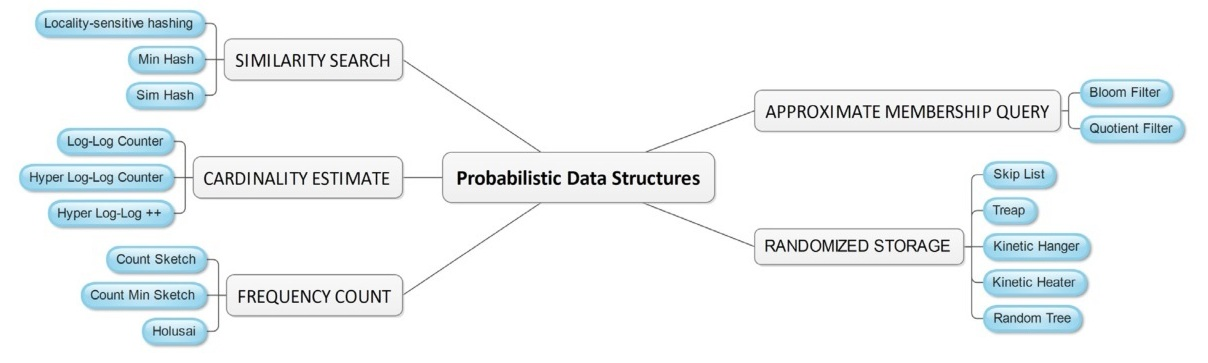

Source: Singh, Amritpal, Sahil Garg, Ravneet Kaur, Shalini Batra, Neeraj Kumar, and Albert Y. Zomaya. "*Probabilistic data structures for big data analytics: A comprehensive review.*"

##### Hash functions

Before proceeding further, it is worth to explain what a *hash function* means. A hash function is a function which is applied on a key by which it produces an integer that can be used as an address of a hash table. Hence one can use the same hash function for accessing the data from the hash table. The integer returned by the hash function is called a hash key[6]. 

There are various types of hash functions used to place the data in a hash table (e.g. *division method*, where the hash function is dependent upon the remainder of a division, *mild square method*, where the first key is squared and then mid part of the result is taken as the index, and *digit folding method*, where the key is divided into separate parts and by using some simple operations these parts are combined to produce a hash key)[6].

A hash function may return the same hash key for more than one record, i.e. a *collision* might occur. The latter is resolved by applying collision resolution techniques among which are *chaining*, *linear probing*, *quadratic probing*, and *double hashing*[5].

### 2.2. Advantages of Probabilistic Data Structures

Probabilistic Data Structures are better than deterministic (regular) ones in terms of simplicity and constant factors involved in actual runtime. They are suitable for **large data processing**, **approximate predictions**, **fast retrieval and storing unstructured data**, thus playing an important role for processing huge data volumes[4]. Hence, PDSs are useful for "Big Data" and streaming applications because they can **decrease the amount of memory needed** (in comparison to data structures that give exact answers)[4]. 

The advantages of PDSs stem from the fact that (a) **they use small amount of memory**; (b) they are **easily parallelizable** (hashes are independent); and (c) they **have constant query time**.

Brief description of the most popular PDSs follows below. 

### 2.3. Brief overview of the most popular Probabilistic Data Structures

The most widely used Probability Data Structures are **Bloom Filter**, **Skip List**, **Count-min Sketch** and **HyperLogLog**.

**Bloom Filter** is a data structure designed to tell, rapidly and memory-efficiently, whether an element is present in a set[7]. It tells if an element *is definitely not in the set* or it *may be in the set*. The hash functions used in Bloom Filter should be independent and uniformly distributed. 
> Hash functions should also be as fast as possible (cryptographic hashes such as *sha1*, though widely used are not very good choices). Examples of fast, simple hashes that are independent enough include *murmur*, the *fnv* series of hashes, and *HashMix*. 

A nice property of Bloom Filter is that its false positive rate could be modified. A larger filter will have less false positives, and a smaller one - more. False positive rate will be approximately $(1-e^{-\frac{kn}{m}})^k$, so one can just plug the number $n$ of elements that should be inserted, and try various values of $k$ and $m$ to configure the filter for a given application. It should be noted here that the more hash functions a Bloom Filter has, the slower it will be, and the quicker it fills up. If it has too few hash functions, however, it may suffer too many false positives[7].

**Skip List** is a Probabilistic Data Structure that is built upon the general idea of a linked list. It uses probability to build subsequent layers of linked lists upon an original linked list. Each additional layer of links contains fewer elements, but no new elements. A Skip List starts with a basic, ordered, linked list. This list is sorted, but a binary search cannot be done on it because it is a linked list and indexing cannot be done into it. But the ordering will come in handy later. Then, another layer is added on top of the bottom list. This new layer will include any given element from the previous layer with probability $p$. This probability can vary, but oftentimes $\frac{1}{2}$ is used. Additionally, the first node in the linked list is often kept as a header for the new layer. The complexity of a Skip List is complicated because of its probabilistic nature[8]. 

**Count-min Sketch** (CMS) is one of the members in the family of memory efficient PDSs used to optimize counting of the frequency of an element in lifetime of a data set. It is a histogram in which one can store elements and associated counts. As compared to Bloom Filters, which represent sets, CMS considers multi-sets, i.e., instead of storing a single bit, CMS maintains a count of all objects. It is called “sketch” because it is a smaller summarization of a larger data set. The probabilistic component of CMS helps in achieving more accurate results in cardinality estimate as compared to counting Bloom Filter which works with less space and time complexity [4].

One of the most frequently used cardinality estimators for massive Big Data is LogLog counter, a probabilistic counting based algorithm which uses 16 bits hash function to randomize data and convert it into uniform binary format. The hashed data set obtained is used for cardinality estimates. **HyperLogLog**, an advanced version of LogLog counter uses the principle of stochastic averaging where 32 bits or 64 bits hash function is used and considers harmonic mean of all the registers ("buckets") to eliminate the effect of outliers[4].

This paper presents how the latter PDS works and what its properties are.

## 3. Construction of HyperLogLog

The HyperLogLog (HLL) algorithm is a space efficient method to **estimate the cardinality** of extraordinarily large data sets[9] by hashing every element, and counting the amount of 0s to the left in said hash[10]. In mathematics, the cardinality of a set is a measure of the "number of elements of the set"[11]. For example, if there is a set of 8 numbers, {4,3,6,2,2,6,1,7}, the cardinality of the membership set would be 6[12]. HLL uses fixed size structures that, depending on the implementation, can be lower than 16kb. In exchange of the low resource requirement, the cardinality measurement is probabilistic, meaning that is bound to have an error that is usually less than 2%[10].

*Singh et al.* explain HLL in detail. In their recent publication[4] HyperLogLog is described as an algorithm that estimates the cardinality of large set by using small memory with the fixed number of registers $r$ of size $m_r$, where size determines the capacity of register to store count, and all parameters are function of expected approximation. 

### 3.1. HyperLogLog elements and construction

According to the above-cited authors, HLL algorithm is based on Bit-pattern observable principle, i.e., the cardinality of a uniform distributed multi-set ($Z$) of numbers is estimated by calculating the maximum number of leading zeros in the binary representation of each number in $Z$. If the maximum number of leading zeros observed in the beginning is $n−1$, i.e., $0^{n−1}1$, an estimate for the number of distinct elements in $Z$ is $2^n$. If single counter is used for estimation then variance in the result will be quite high. The solution proposed is to run same experiments $m$ times with different hash functions and then take the average; this reduces the variance and provides better estimation.

Further, they explain that HLL uses the principle of *stochastic averaging* where input stream is divided into $r$ sub streams and if the standard deviation for each sub-stream is $\sigma$, then the standard deviation for the averaged value is $\frac{\sigma}{\surd r}$. Also, *harmonic mean* is used instead of average to normalize result and to eliminate the effect of outliers. Such means have influence of taming probability distributions, i.e., have slow decaying right tails, operating as a variance reduction device leading to more quality estimates.

## 4. HyperLogLog operation

Functioning of HLL is well illustrated by *Singh et al.* (see the figure below). Streaming data is managed in *input phase* to compute the cardinality of dataset. This data is further provided as input to *hashing phase*, where each data instance is hashed into binary string of $l$ bits. From these $l$ bits, lower $b$ bits are used to determine the register number to be updated and remaining $(l − b)$ bits determine the value to be updated in register. In *register block r*, registers having maximum counter value $m_r$ are maintained. Value of these registers are continuously updated according to hashed value of data instances. To provide the cardinality estimate after observing certain amount of data, *estimator function* is used, in which harmonic mean of all register values is considered to reduce the variance in the cardinality estimation.

**Figure 2. HyperLogLog Framework**

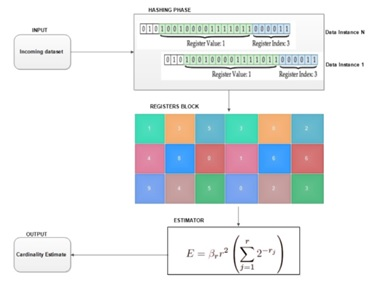

Source: Singh, Amritpal, Sahil Garg, Ravneet Kaur, Shalini Batra, Neeraj Kumar, and Albert Y. Zomaya. "*Probabilistic data structures for big data analytics: A comprehensive review.*"

The input multi-set $Z$ is divided into $r$ sub streams $z_1$, $z_2$...$z_r$, where $r$ is the number of registers used to store the values, given by $r \leftarrow 2^b | b \in Z$ and $b > 0$ and all registers in set $R$ are initially set to $-\infty$. Only one hash function is used to convert domain data to binary stream for Bit-pattern observation, i.e., $H(Z) : D \longrightarrow \{0, 1\}^\infty$. If $s \in \{0, 1\}^\infty$ is a binary stream then $\delta(s)$ is function which returns position of leftmost $1$ in $s$. $\forall z_i|z_i \in R$, hashing is done to convert sub-stream into binary string $\alpha (\alpha \leftarrow H(z_i))$. First $b$ bits of $\alpha$, i.e., $\alpha_{1...b}$ are used to determine the register $r_i$ to be updated and remaining bits are used for register value, i.e., $r_i \leftarrow \delta(\alpha_{b+1,...}$). Estimator function ($E$) of HLL is based on harmonic mean:

$$E = \beta_r r^2 \left(\sum_{j=1}^{r} 2 ^{-r_j}\right)$$

where $\beta_r$ is a constant based upon the size of data set used to correct the systematic multiplicative bias.
The algorithm makes adjustment for small and very large cardinality sets by adjusting the value of $\beta_r$. Every register $r_i \in R$ uses at most $log_2(log_2(n) + O(1))$ bits when cardinalities less than or equal to $n$ need to be estimated. The resulting error is $\frac{1.04}{\sqrt r}$. Accuracy of estimate is improved by increasing the number of registers in HLL.

### 4.1. Possible operations with HyperLogLog

In terms of functionality, HLL supports **addition of elements** and **estimation of their cardinality** but it does not support membership checking of specific elements as done in Bloom Filters [4].

### 4.2.Typical probabilities associated with HyperLogLog

As mentioned above, HLL uses the principle of **stochastic averaging**. Also, **harmonic mean** is used instead of average for normalizing results and for eliminating the effect of outliers.

## 5. Analysis of HyperLogLog structure

The study on PDS, and in particular on HyperLogLog explains its structure and functioning[4]. The assumption made and the proof are as follows: (*Theorem 1*) Let the algorithm HYPERLOGLOG be applied to an ideal multiset of (unknown) cardinality $n$, using $m \geq 3$ registers, and let $E$ be the resulting cardinality estimate.

*Proof*. Let $n$ be the unknown cardinality of $M$. Each substream will comprise approximately $(\frac {n}{m})$ elements. Then, its Max-parameter should be close to $log_2(\frac{n}{m})$. The harmonic mean of the quantities $2^{Max}$ is then likely to be of the order of $\frac{n}{m}$. An ideal multiset of cardinality $n$ is a sequence obtained by arbitrary replications and permutations applied to $n$ uniform identically distributed random variables over the real interval $\left[0 \colon 1\right]$.

It should be noted that the number of distinct elements of such an ideal multiset equals $n$ with probability $1$. Henceforth let $\hat{E}_n$ and $\hat{V}_n$ be the expectation and variance operators under this model. The estimate $E$ is asymptotically almost unbiased in the sense that 

$$\frac{1}{n} \hat{E}_n(E)_{n \rightarrow \infty} = 1 + \delta_1 (n) + O(1)$$

where $\mid \delta_1(n)\mid < 5 \times 10^{-5}$

*as soon as* $m \geq 16$

The standard error defined as $\frac{1}{n} \sqrt {\hat{V}_n(E)}$, where $n \rightarrow \infty$

$$\frac{1}{n} \sqrt {\hat{V}_n(E)_{n \rightarrow \infty}} = \frac {\beta_m}{\sqrt m} + \delta_2(n) + O(1)$$

where $\mid \delta_2(n)\mid < 5 \times 10^{-4}$

*as soon as* $m \geq 16$

the constants $\beta_m$ being bounded, with $\beta_{16} = 1.106$, $\beta_{32} = 1.070$, $\beta_{64} = 1.054$, $\beta_{128} = 1.046$, and $\beta_\infty = \sqrt{(3log2)-1} = 1.03896$. The standard error measures in relative terms the typical error to be observed (in a mean quadratic sense). The functions $\delta_1(n)$; $\delta_2(n)$ represent oscilliating functions of a tiny amplitude, which are computable, and whose effect could in theory be at least partly compensated - they can anyhow  be safely neglected for all practical purposes.

The main conclusions from Theorem 1 (with regard to the relative accuracy of HyperLogLog) is numerically close to $\frac{\beta_\infty}{m}$. The algorithm needs to maintain a collection of registers, each of which is at most $log_2log_2(N) + O(1)$ bits, when cardinalities $≤ N$ need to be estimated. As a consequence, using $m = 2048$, hashing on 32 bits, cardinalities till values over $N = 10^9$ can be estimated with a typical accuracy of 2% using 1.5 kB of storage.

### 5.1. Runtimes for operations and space usage

According to the data presented by *James Stanier*, HyperLogLog, if and when introduced, saves more time and memory space in comparison with other popular PDSs. Table 3 shows how two PDS-associated variables differ: 1) *set insertion time* (in milliseconds) - during regular operation and when a probabilistic algorithm is applied, and 2) *Java Virtual Machine (JVM) heap used* (in MB), i.e. the memory set aside for regular operations and for operations applying PDS. These variables are computed for six Universally Unique Identifiers (UUIDs), starting with 10 and proceeding with its power of 2, 3, 4, 5 and 6 (i.e. 100, 1 000, 10 000, 100 000, and 1 000 000).

Bloom Filter values are entered in the first four columns (B – E); next to them are the data for Count-min sketch (F – I), and at the end (J - M) are those for structures using HyperLogLog.

**Table 3. Insertion time and JVM heap used by certain PDSs**

Number of UUIDs | NoBF, set insertion time (ms) | NoBF JVM heap used (MB) | BF, set insertion time (ms) | BF JVM heap used (MB) | NoCMS, set insertion time (ms) | NoCMS JVM heap used (MB) | CMS, set insertion time (ms) | CMS JVM heap used (MB) | NoHLL, set insertion time (ms) | NoHLL JVM heap used (MB) | HLL, set insertion time (ms) | HLL JVM heap used (MB)
- | - | - | - | - | - | - | - | - | - | - | - | -
A | B | C | D | E | F | G | H | I | J | K | L | M
10 | < 1 | < 2 | 71 | 0.01 | < 25 | < 2 | 35 | N/A | 31 | < 2 | 3 | 0.001
100 | 3 | < 2 | 17 | 0.01 | < 25 | < 2 | 30 | N/A | 28 | < 2 | 11 | 0.001
1 000 | 58 | 3 | 84 | 0.01 | 30 | 3 | 69 | N/A | 52 | 3 | 19 | 0.001
10 000 | 122 | 9 | 272 | 0.02 | 257 | 9 | 246 | N/A | 254 | 8 | 164 | 0.001
100 000 | 836 | 37 | 556 | 0.1 | 1200 | 39 | 970 | N/A | 939 | 37 | 841 | 0.001
1 000 000 | 7395 | 264 | 5173 | 0.9 | 4244 | 234 | 4419 | N/A | 4490 | 158 | 4823 | 0.001

Source: James Stanier, Video presentation of “*Probabilistic Data Structures*”

Initially, the time needed for entering data in a data structure using a Bloom Filter is higher than the standard one (a data structure without probabilistic algorithm) (see columns "C" and "D"). This pattern changes when the amount of data gets bigger. Similar correlation is observed for Count-min sketch (see columns "F" and "H"). In other words, as long as one puts lots of data in a set, insertion time gets bigger as he or she goes on. On the other hand, insertion time with HyperLogLog is much lesser, and there are not up- and down movements when UUIDs raise (see columns "J" and "L"). Comparison between set insertion time with Bloom Filter and with HLL is illustrated in the figure below.

In [4]:
pds_data_1 = pd.read_table("PDS_data_01.dat")

In [5]:
pds_data_1

,Number of UUIDs,"BF, insertion time (ms)","HLL, insertion time (ms)"
0,Ten UUIDs(10),71,3
1,Hundred UUIDs(100),17,11
2,Thousand UUIDs(1000),84,19
3,Ten thousand UUIDs(10000),272,164
4,Hundred thousand UUIDs(100000),556,841


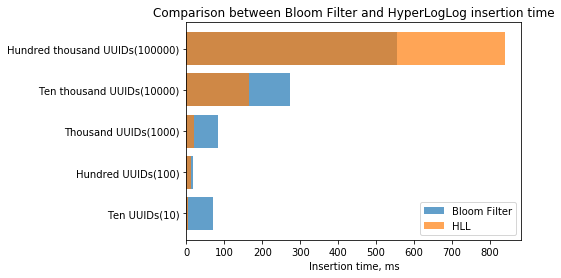

In [6]:
plt.barh(pds_data_1["Number of UUIDs"], pds_data_1["BF, insertion time (ms)"], label = "Bloom Filter", alpha = 0.7)
plt.barh(pds_data_1["Number of UUIDs"], pds_data_1["HLL, insertion time (ms)"], label = "HLL", alpha = 0.7)

plt.xlabel("Insertion time, ms")
plt.title("Comparison between Bloom Filter and HyperLogLog insertion time")
plt.legend()
plt.show()

The data also shows that a significant difference in terms of *JVM heap used* exists between Bloom Filter and HyperLogLog (there is no JVM heap data for Count-min sketch). The former needs 0.01 to 0.9 MB (depending on the number of UUIDs) (see column "E"), whereas HLL uses only 0.001 MB (see column "M") regardless of the UUIDs entered, i.e. the latter is 10 to 1000 times more efficient.

It should be mentioned here that in their leading paper on HLL, Flajolet et al.[14] proved that HyperLogLog counter can count one billion distinct items with an error of 2% using only 1.5 KB of memory.

### 5.2. Advantages and drawbacks of HyperLogLog

The greatest advantage of HLL is that it uses **fixed size structures** (could be lower than 16kb) and demonstrates **low resource requirement** in terms of set insertion time and memory size.

On the other hand, HLL’s calculation of the cardinality is not perfect and operates with a margin of **error** of 2%. This means that given any set, there is a chance that the HLL will produce a cardinality that is slightly inaccurate and the significance of that margin of error can be higher for smaller sets[12]. 

## 6. HyperLogLog Application

According to *Singh et al.*, HLL finds usage in different application domains like **natural language processing**, **biological data**, **large structured databases mining**, **networks used for traffic monitoring**, **security related issues** in networks like detection of worm propagation and detecting DoS (Denial of Service) attack, **data analytics**, etc. HLL is used by Google, Redis, Amazon, etc.[4].

Furthermore, virtual Hyperloglog finds applications in **network traffic measurement and database systems** by utilizing compact memory. HLL has also proved to be useful in **computing fast and accurate Genomic Distances**. As a whole, this Probabilistic Data Structure can be valuable to any business that has large sets of data[12].

### 6.1. HyperLogLog implementation at Redis 

Redis [15] is an open source (BSD licensed), in-memory data structure store, used as a database, cache and message broker. It supports data structures such as *strings*, *hashes*, *lists*, *sets*, *sorted sets with range queries*, *bitmaps*, *hyperloglogs*, *geospatial indexes with radius queries* and *streams*. Redis implements its HLL structure using 16384 registers or “buckets”, bringing the standard error to 0.81%[10].

As for the hash function, the one used by Redis has a 64 bit output, meaning that it is using the first 14 bits to address the 16k registers and the remaining 50 bits are being used to count the amount of 0s to the left. Each bucket will be storing the highest stream of 0s to that point, being the highest possible 50 (because there are only 50 remaining bits from the hash that can be 0s), each bucket will need 6 bits to be able to store up to the number 50 (which is 110010 in binary). Adding it up, there will be a need of 98304 bits (6 for each bucket) to store 1 HLL structure and if those bits are translated into bytes, we get 12288 bytes (or 12kb) which is the size that any HyperLogLog will have in the Redis implementation [10].

Redis HyperLogLog probabilistic cardinality approximation file explains how it implements the HLL algorithm. Its description is not provided here since it is too long and the code is written in a *non-Python* language. Still, Redis HLL algorithm could be found at the following link: http://download.redis.io/redis-stable/src/hyperloglog.c.

### 6.2. Other HyperLogLog implementation

An example of a much simpler HLL implementation written in Python is provided below. It is developed and described by *Nick Johnson* in his blog[16]. He starts with the following assumptions:
1.	Generating $n$ evenly distributed random numbers
2.	Arbitrarily replicating some of those numbers an unspecified number of times
3.	Shuffling the resulting set of numbers arbitrarily

The first important thing is to estimate how many unique numbers there are in the resulting dataset. Knowing that the original set of numbers was random and evenly distributed, a very simple possibility occurs: the smallest number in the set should be found. If the maximum possible value is $m$, and the smallest value found is $x$, it could then be estimated that there will be about $\frac {m}{x}$ unique values in the total set. For instance, if a dataset of numbers between 0 and 1 is scanned, and it turns out that the smallest value in the set is 0.01, it is reasonable to assume that there are roughly 100 unique values in this set.

For his example Johnson refers to the paper *Probabilistic Counting Algorithms for Data Base Applications* by Flajolet and Martin. They observe that a good hash function helps for obtaining any arbitrary set of data and turn it into what is needed, with evenly distributed, (pseudo-) random values. 

The metric *Flajolet and Martin* pick is counting the number of 0 bits at the beginning of the hashed values. It is easy to see that in random data, a sequence of $k$ zero bits will occur once in every $2^k$ elements, on average; all that need to be done is to look for these sequences and record the length of the longest sequence to estimate the total number of unique elements. This still is not a great estimator, though - at best it can give a power of two estimate of the number of elements. On the plus side, this estimate is very small: to record sequences of leading 0s of up to 32 bits, only a 5 bit number is needed.

So far there is a rather poor estimate of the number of values in the dataset based on bit patterns. It can be improved by using multiple independent hash functions. If each hash produces its own set of random outputs, the longest observed sequence of leading 0s from each could be recorded; at the end the values could be averaged for a more accurate estimate.
This gives a good result statistically speaking, but, as Nick Johnson reminds, hashing is expensive. As mentioned earlier, better approach is using *stochastic averaging*. Instead of using multiple hash functions, just a single one will do the job with taking part of its output to split values into one of many buckets (above referred to as “registers”). If 1024 values are required, one should take the first 10 bits of the hash function as a bucket number, and use the remainder of the hash to count leading 0s. This loses nothing in terms of accuracy, but saves a lot of redundant computation of hashes.

A simple implementation of this procedure is shown below. Nick Johnson states that it is equivalent to the LogLog algorithm in the *Durand-Flajolet* paper; for convenience and clarity, though, trailing (least-significant) 0 bits rather than leading ones are counted; the result is exactly equivalent.

In [7]:
def trailing_zeroes(num):
    """Counts the number of trailing 0 bits in num."""
    if num == 0:
        return 32 # Assumes 32 bit integer inputs!
    p = 0
    while (num >> p) & 1 == 0:
        p += 1
    return p

def estimate_cardinality(values, k):
    """Estimates the number of unique elements in the input set values.

  Arguments:
    values: An iterator of hashable elements to estimate the cardinality of.
    k: The number of bits of hash to use as a bucket number; there will be 2**k buckets.
  """
    num_buckets = 2 ** k
    max_zeroes = [0] * num_buckets
    for value in values:
        h = hash(value)
        bucket = h & (num_buckets - 1) # Mask out the k least significant bits as bucket ID
        bucket_hash = h >> k
        max_zeroes[bucket] = max(max_zeroes[bucket], trailing_zeroes(bucket_hash))
    return 2 ** (float(sum(max_zeroes)) / num_buckets) * num_buckets * 0.79402

A bunch of counts of leading (or trailing) zeroes is kept; the average is counted at the end; if average is $x$, the estimate is $2^x$, multiplied by the number of buckets. Not mentioned previously is this magic number $0.79402$. According to Johnson, statistical analysis shows that this procedure introduces a predictable bias towards larger estimates; this magic constant is derived in the paper by *Durand-Flajolet* to correct that bias. The actual figure varies with the number of buckets used, but with larger numbers of buckets (at least 64), it converges on the estimate used in the above algorithm. 

This procedure gives a pretty good estimate - for $m$ buckets, the average error is about $\frac{1.3}{\sqrt m}$. Thus, with 1024 buckets (for $1024 \times 5 = 5120$ bits, or $640$ bytes), one can expect an average error of about $4\%$; 5 bits per bucket is enough to estimate cardinalities up to $2^{27}$. Johnson thinks this is pretty good for less than a kilobyte of memory.

A trial with random data is provided below:

In [8]:
[100000/estimate_cardinality([random.random() for i in range(100000)], 10) for j in range(10)]

[117.93485465373247,
 118.49499265575311,
 118.01471196360082,
 117.61596542118055,
 117.69560680136186,
 118.6555201794191,
 118.2546084827044,
 117.53637793213086,
 118.01471196360082,
 118.49499265575311]

Johnson notes that Python's builtin ``hash()`` hashes integers to themselves. As a result, running something like ``estimate_cardinality(range(10000), 10)`` will give wildly divergent results, because ``hash()`` is not behaving like a good hash function.

## Conclusion

By inventing and applying Probabilistic Data Structures, mathematics (once again) helped for solving a real-life problem. In the above described case it was caused by the remarkable and constant increase of data generated by almost every business and end user after Internet and ICTs spread around the world. Regardless of their insignificant inaccuracy, Probabilistic Data Structures provide reliable and resource efficient solutions to the “Big Data” problem.

## References

[1] Codecademy. “What Are Data Structures?”, 05.09.2018, https://news.codecademy.com/why-data-structures/ (Accessed online: April 2020).

[2] Medium. “Hashes power Probabilistic Data Structures”, 13.01.2019, https://towardsdatascience.com/hashes-power-probabilistic-data-structures-d1398d1335c6 (Accessed online: April 2020).

[3] Medium. “8 Common Data Structures every Programmer must know. A quick introduction to 8 commonly used data structures”, 28.02.2020, https://towardsdatascience.com/8-common-data-structures-every-programmer-must-know-171acf6a1a42 (Accessed online: April 2020).

[4] Singh, Amritpal, Sahil Garg, Ravneet Kaur, Shalini Batra, Neeraj Kumar, and Albert Y. Zomaya. "Probabilistic data structures for big data analytics: A comprehensive review." Knowledge-Based Systems 188 (2020): 104987.

[5] Gakhov, about the book “Probabilistic Data Structures and Algorithms for Big Data Applications”, 2018, https://www.gakhov.com/books/pdsa.html (Accessed online: April 2020). 

[6] IncludeHelp.com, “Hashing (Hash table, Hash functions and its characteristics)”, 21.06.2018 https://www.includehelp.com/data-structure-tutorial/hashing.aspx (Accessed online: April 2020).

[7] GitHub, “Bloom Filters by Example”, https://llimllib.github.io/bloomfilter-tutorial/ (Accessed online: May 2020).

[8] Brilliant, “Skip List”, https://brilliant.org/wiki/skip-lists/ (Accessed online: May 2020).

[9] Python Package Index, “HyperLogLog. Project description”, 28.04.2020, https://pypi.org/project/HLL/ (Accessed online: May 2020).

[10] Medium, Devartis, “Hyperloglog: Obtaining the cardinality of a set in a probabilistic way”, 24.01.2018, https://blog.devartis.com/hyperloglogs-a-probabilistic-way-of-obtaining-a-sets-cardinality-3b5e6a982a12 (Accessed online: May 2020). 

[11] Wikipedia, “Cardinality”, 25.04.2020, https://en.wikipedia.org/wiki/Cardinality (Accessed online: May 2020).

[12] Riak, “What in the HeLL is HyperLogLog?”, 04.01.2017, https://riak.com/posts/technical/what-in-the-hell-is-hyperloglog/index.html?p=13169.html (Accessed online: May 2020).

[13] James Stanier, Video presentation of “Probabilistic Data Structures”, 19.05.2016, https://www.youtube.com/watch?v=F7EhDBfsTA8 (Accessed online: May 2020).

[14] Flajolet, Philippe & Fusy, Eric & Gandouet, Olivier & Meunier, Frédéric. (2012). “HyperLogLog: The analysis of a near-optimal cardinality estimation algorithm”, https://www.researchgate.net/publication/29598188_HyperLogLog_The_analysis_of_a_near-optimal_cardinality_estimation_algorithm (Accessed online: May 2020).

[15] Redis, “Introduction to Redis”, https://redis.io/topics/introduction (Accessed online: May 2020).

[16] Nick's Blog, "Damn Cool Algorithms: Cardinality Estimation", 07.09.2012, http://blog.notdot.net/2012/09/Dam-Cool-Algorithms-Cardinality-Estimation (Accessed online: May 2020).